In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Car Price Analysis

* Read in the dataset `car_prices.csv` using the code below.
* Run the info and describe DataFrame methods to get a quick understanding of the data.

In [3]:
cars = pd.read_csv("C:/Jupyter/car_prices.csv", on_bad_lines='skip')

In [4]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [6]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


# Numeric Variable Relationships

We will use a pairplot to get a good sense for the relationships between the numeric variables in the dataset.

Turn off the upper corner of the pairplot matrix.

Questions to Ask:
* Why do you think the relationship between `sellingprice` and `mmr` (the recommended selling price) is so strong?
* What is the relationship between `sellingprice` and `year` (the year the car was manufactured). Does this make sense?
* Once you've looked at the two relationships above, filter your dataframe down to the `body` styles ['SUV', 'Sedan', 'Convertible', and 'Coupe']. Color the scatterplot based on values in the `body` column. 

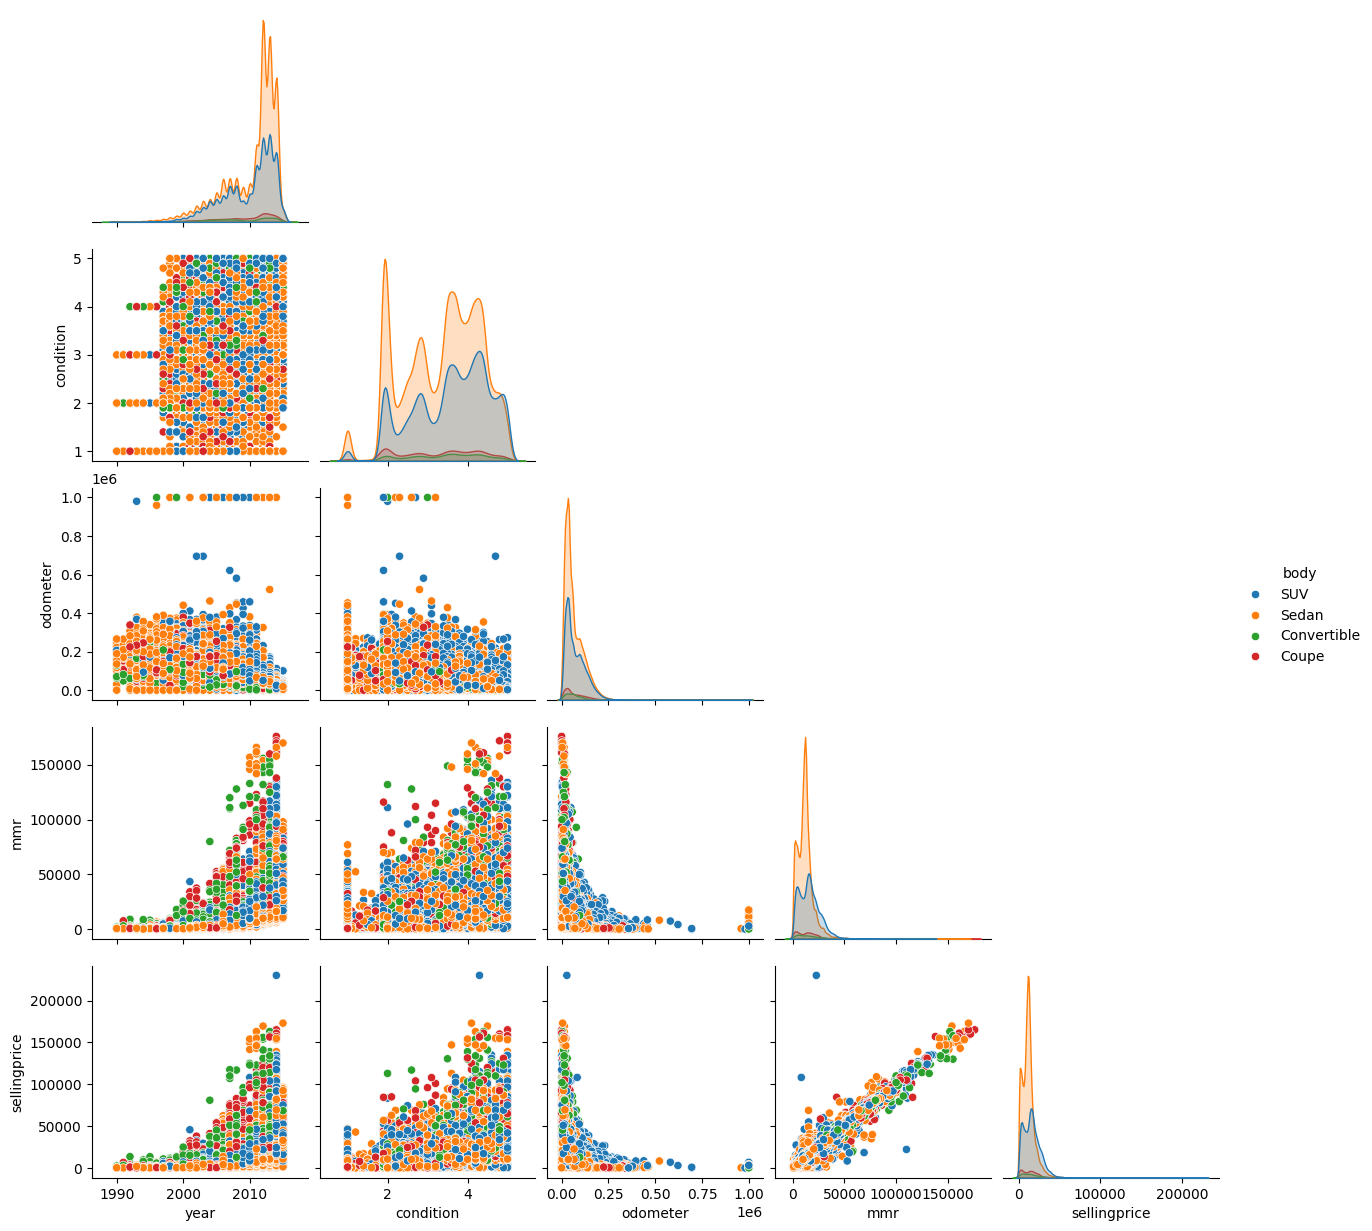

In [7]:
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]  # Defines a list of car body styles to include in the plot

# Creates a pairplot using Seaborn for the filtered dataset
sns.pairplot(
    cars.query("body in @style_list"),  # Filter the dataset to include only the specified body styles
    corner=True,  # Shows only the lower triangle of the plot to reduce redundancy
    hue='body'  # Colors the plots based on the car body style for better differentiation
)

#### Value Retention

* We will filter the data down to the following values of `make` (brand): ['Ford', 'BMW', 'Toyota', 'Chevy'] 

* We will build a linear relationship plot comparing `odometer` (distance car has travelled) vs. `sellingprice`, broken out by `make`.

* If you want to fit a regression with scipy.stats, use dropna() on the dataframe first.

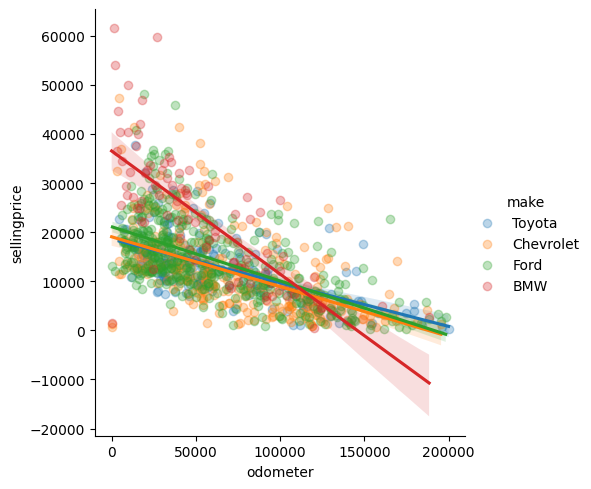

In [9]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

# Creates a scatterplot with a regression line using Seaborn's lmplot
sns.lmplot(
    x="odometer",  # Sets the x-axis to represent the odometer reading
    y="sellingprice",  # Sets the y-axis to represent the selling price
    data=cars.query("make in @brand_list and sellingprice <150000 and odometer < 200000").sample(1000),  # Filters data for selected brands and reasonable price/odometer values
    hue="make",
    scatter_kws=({"alpha": .3}),  # Sets scatterplot transparency to 30% for better visibility in dense areas
)

In [10]:
import scipy.stats as stats

# Removes rows with missing values from the dataset to ensure a clean regression analysis
cars_regress = cars.dropna()

# Performs a linear regression between odometer readings and selling price
stats.linregress(x=cars_regress["odometer"], y=cars_regress["sellingprice"])

LinregressResult(slope=np.float64(-0.10686305954841516), intercept=np.float64(20818.28408595647), rvalue=np.float64(-0.5773849819198604), pvalue=np.float64(0.0), stderr=np.float64(0.00021987650761310986), intercept_stderr=np.float64(18.58796228286367))

In [11]:
for brand in brand_list:
    data = cars_regress.loc[cars_regress["make"] == brand]
    print(f"{brand}: {stats.linregress(data['odometer'], data['sellingprice'])[0:2]}")

Ford: (np.float64(-0.09953734771818873), np.float64(20840.011075886512))
BMW: (np.float64(-0.2225033042967633), np.float64(35567.979744684795))
Toyota: (np.float64(-0.07594777614361674), np.float64(17813.017107685304))
Chevrolet: (np.float64(-0.08841045962774952), np.float64(18705.587357485056))


# Categorical Variable Relationships

* We will bin the `condition` variable into increments of .5. For example, the first bin will be '1-1.5', the second '1.5-2', and so on up until the maximum condition value of 5. Use pd.cut() to create the bins.

* We will build a barplot of the average price by condition bin.

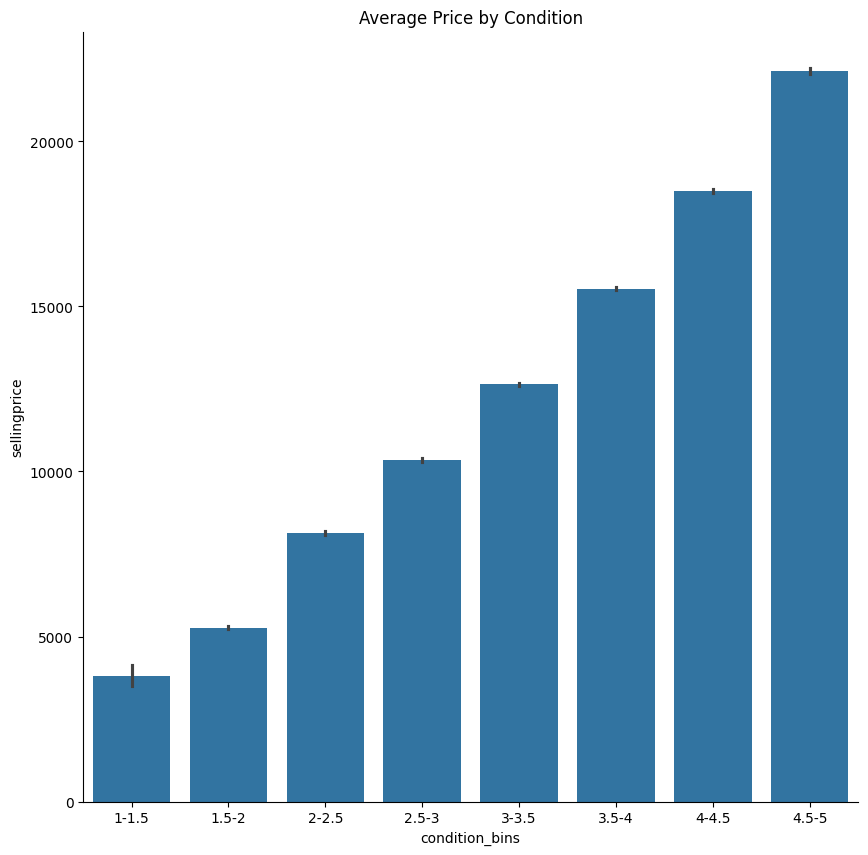

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))  # Creates a figure and axis object with a specified figure size

# Defines bin edges to categorize car condition values (from 1 to 5) into 8 bins
bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]  # Define labels for each bin range

cars["condition_bins"] = pd.cut(cars["condition"], bins=bins, labels=labels)  # Creates a new column categorizing cars into condition bins

# Creates a bar plot showing the average selling price for each condition bin
sns.barplot(
    x="condition_bins",
    y="sellingprice",
    data=cars
)

ax.set_title("Average Price by Condition")

sns.despine()

# Price by make and condition

* We will create a pivot table with the top 10 most common car brands `make` column as rows, and condition bins as columns. The values in the table should be the average selling price for each make/condition combination. Consider using value_counts to get the top 10 most common brands.

* Once we've created the table, we will build a heatmap from the data. Which brands and quality levels have the highest selling prices? Does this match our expecations?

In [13]:
cars["make"].value_counts()

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
ford tk           1
chev truck        1
airstream         1
dot               1
Lotus             1
Name: count, Length: 96, dtype: int64

In [14]:
top10 = cars["make"].value_counts().iloc[:10].index  # Gets the top 10 most common car brands in the dataset

# Computes the average selling price for each condition bin within the top 10 brands
avgs = (cars
        .loc[cars["make"].isin(top10)]  # Filters dataset to include only the top 10 brands
        .pivot_table(index="make",  # Sets car make as the index
                     columns="condition_bins",  # Uses condition bins as columns
                     values={"sellingprice": "mean"}  # Calculates the mean selling price for each group
                    )
        .droplevel(0, axis=1)  # Drops the extra level from the column multi-index for a cleaner format
       )

avgs.head()

condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556


<Axes: title={'center': 'Avg. Selling Price by Make and Quality'}, xlabel='condition_bins', ylabel='make'>

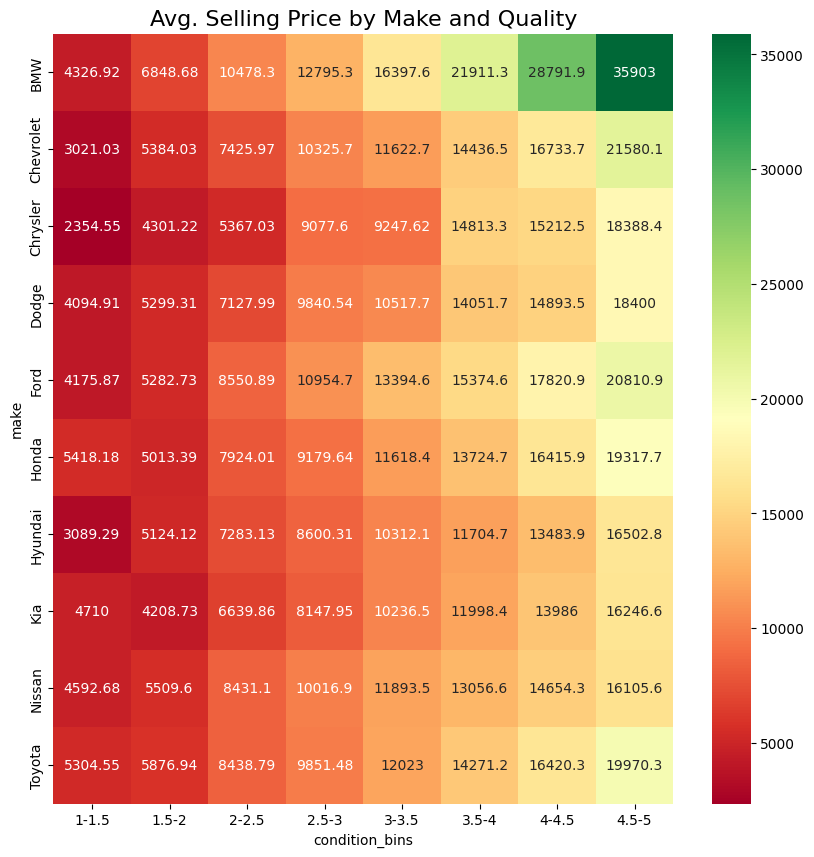

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))


plt.title("Avg. Selling Price by Make and Quality", fontsize=16)

# Creates a heatmap to visualize the average selling price for each make and condition bin
sns.heatmap(
    avgs,  # Data: Pivots table with average selling prices
    annot=True,  # Displays the actual values in the heatmap cells
    cmap="RdYlGn",  # Uses a red-yellow-green color gradient for better interpretation
    fmt="g"  # Formats the annotations as general numeric values (no scientific notation)
)

# Ford F-150 Deep Dive

Our client is mostly interested in purchasing work trucks - specifically the Ford F-150, the highest selling automobile for decades in the US. 

* We will filter our data down to rows where `model` is "F-150".
* Then build a histogram of sellingprice with 10 bins. 

In [16]:
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5


<Axes: xlabel='sellingprice', ylabel='Count'>

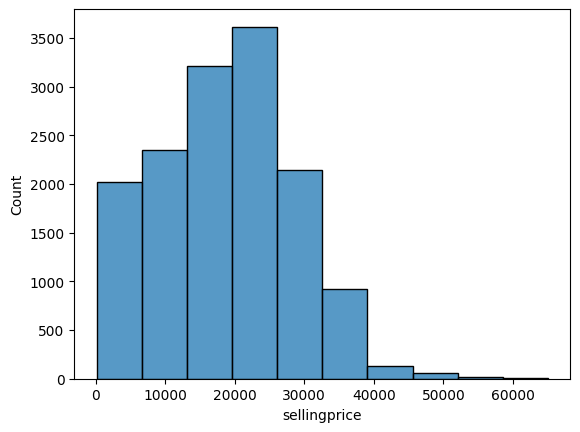

In [17]:
sns.histplot(x="sellingprice",
            bins=10,
            data=f150s)

* Build a barplot of `sellingprice` by `trim` for the F150s.

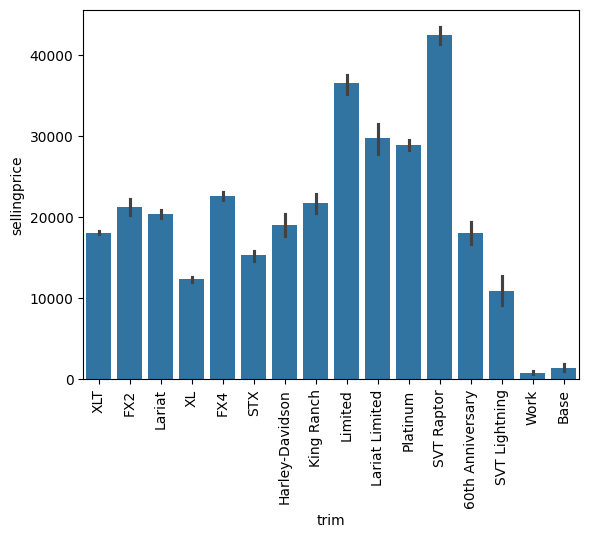

In [18]:
fig, ax = plt.subplots()

sns.barplot(x="trim", y="sellingprice", data=f150s)

plt.xticks(rotation=90)

plt.show()

* Filter the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"].

* Then, build a jointplot of `condition` (not binned) by `sellingprice`.

In [19]:
f150s_reduced = f150s.query("trim in ['XL', 'XLT', 'Platinum', 'SVT Raptor']")

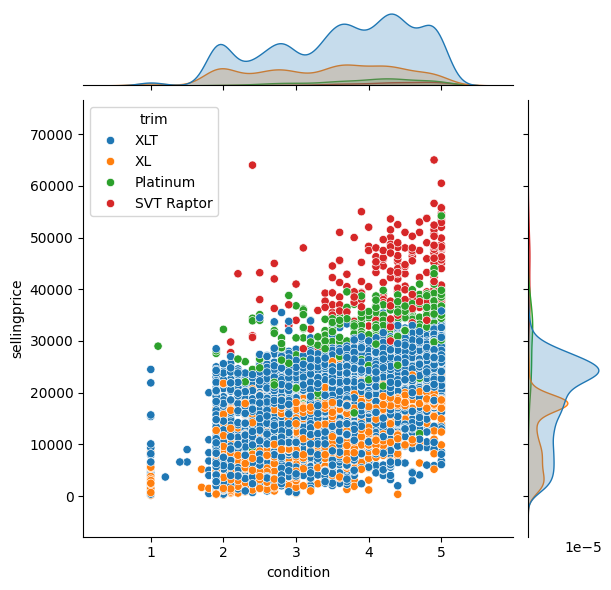

In [20]:
# Creates a joint plot to visualize the relationship between condition and selling price
sns.jointplot(
    x="condition", 
    y="sellingprice", 
    kind="scatter",   # Uses a scatter plot to show individual data points
    data=f150s_reduced,  # Uses the filtered dataset (likely containing only Ford F-150 trucks)
    hue="trim"  # Colors points based on the trim level of the truck
)

### Are there any "Deals"?

Ok, thanks to the charts above we're getting closer to honing in on the trucks to purchase.

* We will create a column `diff_to_mmr` which is the difference between `sellingprice` and `mmr`.
* Then build a barplot looking at mean `diff_to_mmr` by `color`.
* Which color sells for more than the recommended price?

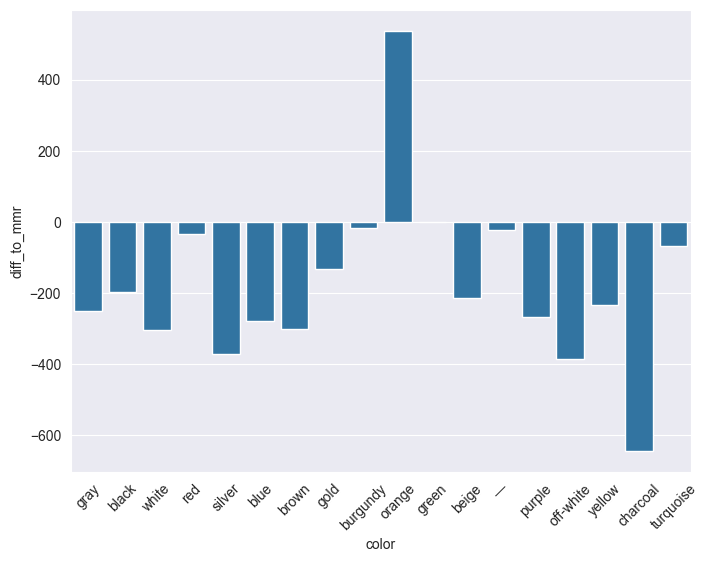

In [21]:
sns.set_style("darkgrid")

f150s = f150s.assign(diff_to_mmr = f150s["sellingprice"] - f150s["mmr"])

fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(
    x="color",
    y="diff_to_mmr",
    data=f150s,
    ci=None
)

plt.xticks(rotation=45)

plt.show()

In [22]:
f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins,diff_to_mmr
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,500
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,3800
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4,2500
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5,600
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5,-700


* Further we will filter the data to the trims below. Exclude the color 'orange' and look only at trucks from years between 2009 and 2014. 

In [23]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

f150s_reduced = f150s.query("color != 'orange' and trim in @trim_list")

# Creates a pivot table for average selling price by trim and condition bins, for model years 2009-2014
f150s_pivot = (
    f150s_reduced
    .loc[f150s_reduced["year"].between(2009, 2014)]   # Filters for vehicles manufactured between 2009 and 2014
    .pivot_table(
        index="trim",
        columns="condition_bins",
        values={"sellingprice": "mean"} # Computes the mean selling price for each group
    )
)

<Axes: xlabel='None-condition_bins', ylabel='trim'>

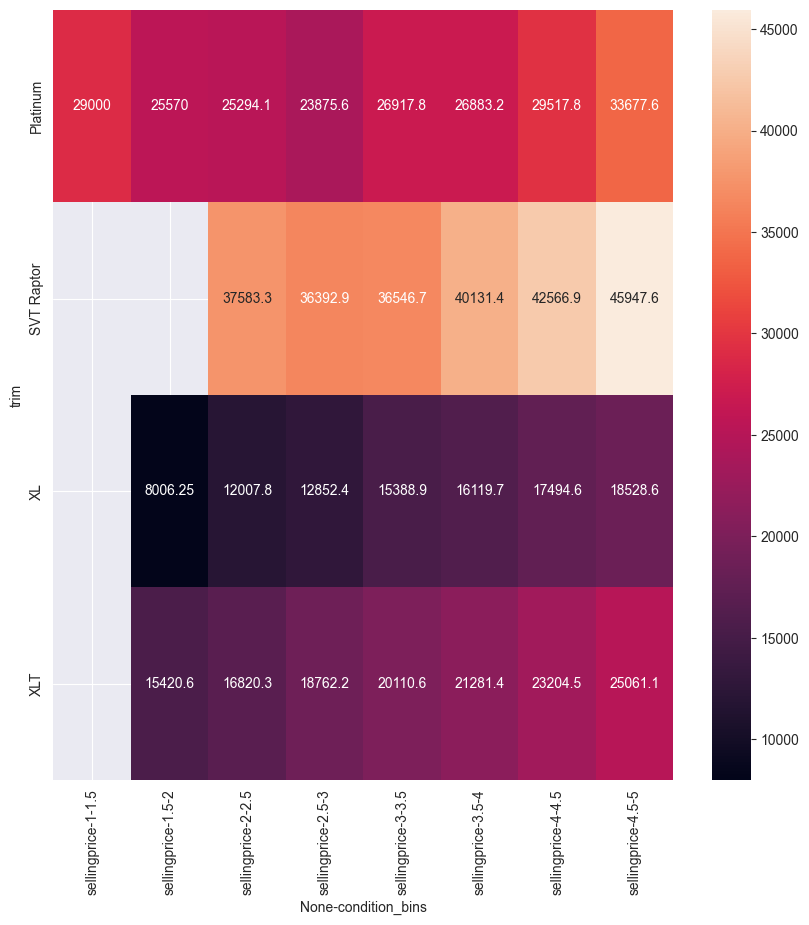

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(f150s_pivot, annot=True, fmt="g")

### Best state to buy trucks in?

* Ok, we've decided on the XLT model, it has more features than XL but is still quite affordable. Also filter out any trucks with a quality of less than 3.5. Your DataFrame should only have trucks with a quality of 3.5 or greater.
* We will build a subplot with a bar chart of `state` by `diff_to_mmr` and `state` by `count` to find which states sell XLT models below mmr and have ample quantity.

<Axes: xlabel='state', ylabel='auto_count'>

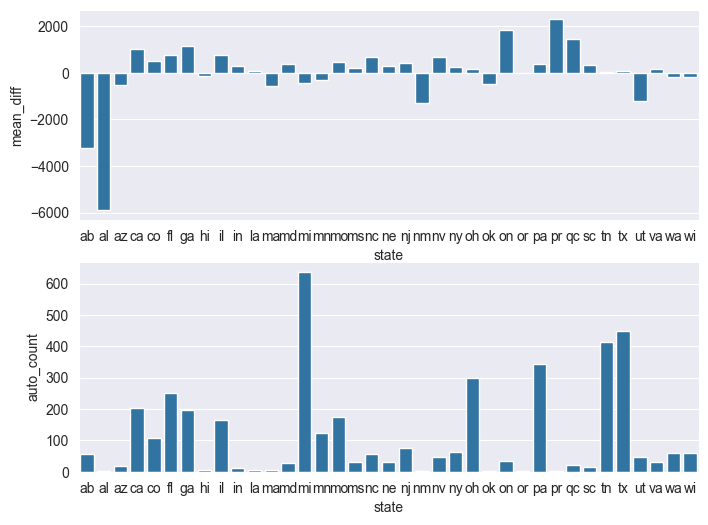

In [25]:
# Filters the dataset for XLT trim trucks with a condition rating of 3.5 or higher, then group by state and compute aggregate statistics
f150s_XLT = (f150s_reduced
             .query("trim == 'XLT' and condition >= 3.5")  # Keeps only XLT trims with condition 3.5 or higher
             .groupby(['state'], as_index=False)  # Groups data by state
             .agg(
                 mean_diff=("diff_to_mmr", 'mean'),  # Computes the average difference to MMR (Market-Moving Retail price)
                 auto_count=("diff_to_mmr", "count")  # Counts the number of vehicles in each state
             )
)

fig, ax = plt.subplots(2, figsize=(8, 6))

sns.barplot(
 x="state",
 y="mean_diff",
 data = f150s_XLT,
 ax=ax[0]
)

sns.barplot(
 x="state",
 y="auto_count",
 data = f150s_XLT,
 ax=ax[1]
)


* Ok, looks like Utah, `state=='ut'`, (our client has an office nearby) has a good amount of quantity and a low average price. Take a look at the average diff_to_mmr and count of cars by saledate - feel free to return just a table. 

In [26]:
f150s.query("trim=='XLT' and state == 'ut' and condition > 3.5").groupby("saledate").agg({"diff_to_mmr":["mean", "count"]})

diff_to_mmr      
                                                mean count
saledate                                                  
Wed Feb 04 2015 03:30:00 GMT-0800 (PST) -1400.000000     2
Wed Feb 11 2015 03:30:00 GMT-0800 (PST) -1605.000000    10
Wed Feb 18 2015 03:30:00 GMT-0800 (PST)  -542.857143     7
Wed Feb 25 2015 03:30:00 GMT-0800 (PST)  -950.000000     4
Wed Jan 07 2015 11:30:00 GMT-0800 (PST) -2325.000000     2
Wed Jan 21 2015 03:30:00 GMT-0800 (PST)  -900.000000     2
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT) -2120.000000     5
Wed Mar 04 2015 03:30:00 GMT-0800 (PST)  -600.000000     5